<h1>Importing All Necessary Modules<h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


Cervical Cancer Risk Factors for Biopsy: This Dataset is Obtained from UCI Repository and kindly acknowledged!
This file contains a List of Risk Factors for Cervical Cancer leading to a **Biopsy** Examination!

<h1>Data Preparation<h1>

Read the dataset and choose only numerical data. There are some columns containing nan values notated as '?'. For this tutorial, you can ignore those to save some time. Analyze your dataset and check whether Biopsy target column is well balanced or not.

In [2]:
df = pd.read_csv('../data/kag_risk_factors_cervical_cancer.xls')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df.shape

(858, 36)

In [4]:
df['Biopsy'].value_counts() / df.shape[0] * 100

Biopsy
0    93.589744
1     6.410256
Name: count, dtype: float64

In [5]:
numdf = df.select_dtypes([np.int64, np.float64])

In [6]:
numdf.shape

(858, 10)

<h1>Modeling<h1>

Choosen X and y and split them into train and test parts. Fit your SVC model with default parameters and get predictions for test dataset. 

In [7]:
X = numdf.drop('Biopsy', axis = 1)
y = numdf.Biopsy

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [9]:
clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)

Obtain a confusion matrix. Note that it is important if you input test or predictions first. Usually, first argument is defined as true values of target while the second one is predictions. 

In [10]:
con_matrix = confusion_matrix(y_test, y_pred)

Plot a confusion matrix by using heatmap method in seaborn library. Use the parameter of annot = True.

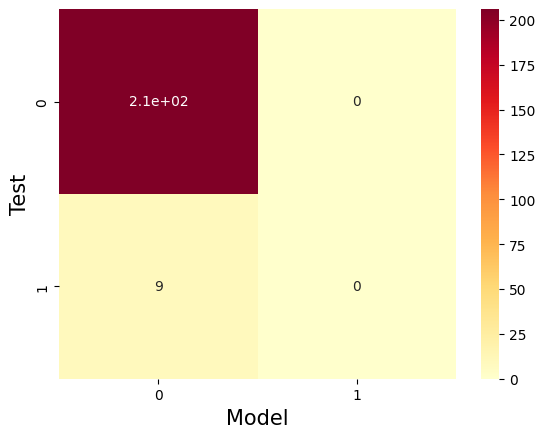

In [11]:
ax = sns.heatmap(con_matrix, annot = True, cmap = 'YlOrRd')
ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('Test', fontsize = 15)
plt.show()

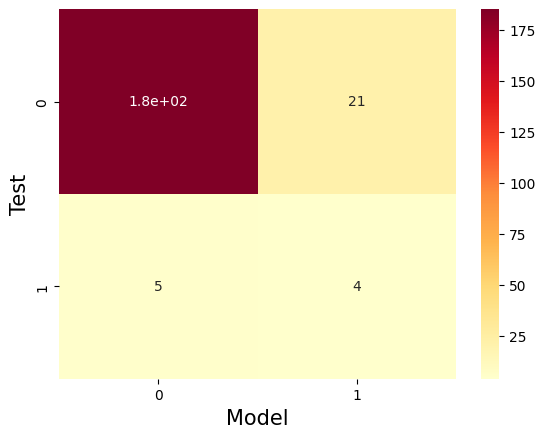

In [12]:
## Due to zero values, class_weight parameter can be used so that zero division error will not occur for next task
clf = SVC(class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
con_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(con_matrix, annot = True, cmap = 'YlOrRd')
ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('Test', fontsize = 15)
plt.show()

Obtain precision, recall, and f1 scores. There is a parameter of pos_label which can only be used for binary classification. It can be defined as 0 and 1 for this dataset since they are unique values of classes.

In [13]:
print(precision_score(y_test, y_pred))
print(precision_score(y_test, y_pred, pos_label = 0))

0.16
0.9736842105263158


In [14]:
print(recall_score(y_test, y_pred))
print(recall_score(y_test, y_pred, pos_label = 0))

0.4444444444444444
0.8980582524271845


In [15]:
## In my case f1 score is very low for class 0.
print(f1_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label = 0))

0.23529411764705882
0.9343434343434345


By looking at confusion matrix, apply the following formulas and compare your findings with predefined values of precision, recall, and f1 scores

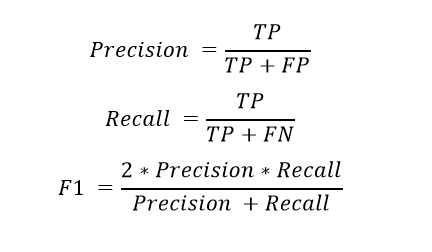

In [16]:
TN, FP, FN, TP = con_matrix.reshape(-1)

In [17]:
TN, FP, FN, TP

(185, 21, 5, 4)

In [18]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2 * Precision * Recall / (Precision + Recall)

In [19]:
## They are for class 0
Precision, Recall, F1

(0.16, 0.4444444444444444, 0.23529411764705882)

Play around parameters to fix overfitting issue and plot a confusion matrix again to see how results changed later. Use GridSearchCV. There is an exemplary applications available on the next cell

In [20]:
param_grid = {'class_weight': ['balanced'],
         'C': [1, 10]}

gscv = GridSearchCV(
    clf,
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1 # used for benefitting from all available CPU
    )


Fit the new estimator

In [21]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 10], 'class_weight': ['balanced']})

Use attributes of best_params_, best_score_, and cv_results_ to analyze your results. cv_results_ will return dictionary so it can be converted to pd.DataFrame in order to understand clearly

In [22]:
gscv.best_params_

{'C': 10, 'class_weight': 'balanced'}

In [23]:
gscv.best_score_

0.9533672480620154

In [24]:
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030450,0.001529,0.017915,0.000547,1,balanced,"{'C': 1, 'class_weight': 'balanced'}",0.875969,0.806202,0.852713,0.81250,0.851562,0.839789,0.02641,2
1,0.034562,0.003910,0.009193,0.002392,10,balanced,"{'C': 10, 'class_weight': 'balanced'}",0.953488,0.953488,0.937984,0.96875,0.953125,0.953367,0.00973,1


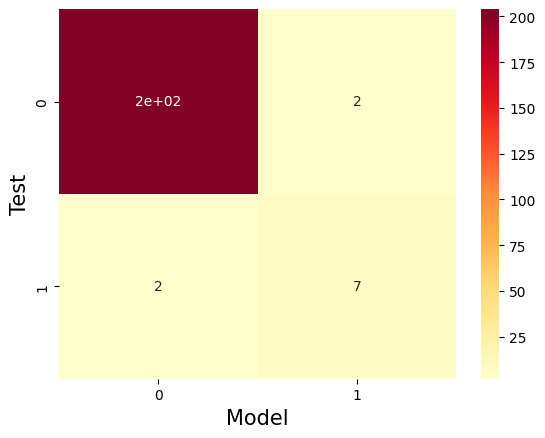

In [25]:
## Applying new parameters
clf = SVC(C = 10, class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
con_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(con_matrix, annot = True, cmap = 'YlOrRd')
ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('Test', fontsize = 15)
plt.show()

In [26]:
print(precision_score(y_test, y_pred))
print(precision_score(y_test, y_pred, pos_label = 0))

0.7777777777777778
0.9902912621359223


In [27]:
print(recall_score(y_test, y_pred))
print(recall_score(y_test, y_pred, pos_label = 0))

0.7777777777777778
0.9902912621359223


In [28]:
print(f1_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label = 0))

0.7777777777777778
0.9902912621359223


It seems grid search cv method helped us to find better applicable parameters for the model so that we could have higher accuracies. You can include as many parameters as you want, however, do not forget to consider time complexity problems, especially if we are talking about SVC model. The method is extremely time consuming. In the future you will also see how Random Forest, XGBooster, and other ensemble family members lack from speed. One way to deal with this situation is to use RandomizedSearchCV. It reduces CPU computation for finding optimal parameters by ignoring some possible combinations of parameters unlike GridSearchCV where we desire to look through all possible combinations.